In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import os

## Load all Excel Files

In [16]:
#Define Metropolitan Areas
MMA = dict()

MMA = {'Ibaraki-ken': 'Kanto', 'Tochigi-ken': 'Kanto', 'Gumma-ken': 'Kanto', 'Saitama-ken': 'Kanto', 'Chiba-ken': 'Kanto', 'Tokyo-to': 'Kanto', 'Kanagawa-ken': 'Kanto', 'Yamanashi-ken': 'Kanto',
      'Shiga-ken': 'Keihanshin', 'Kyoto-fu': 'Keihanshin', 'Osaka-fu': 'Keihanshin', 'Hyogo-ken': 'Keihanshin', 'Nara-ken': 'Keihanshin', 'Wakayama-ken': 'Keihanshin', 
      'Aichi-ken': 'Chukyo', 'Mie-ken': 'Chukyo', 'Gifu-ken': 'Chukyo', 
      'Fukuoka-ken': 'Fukuoka Kitakyushu', 
      'Shizuoka-ken': 'Shizuoka Hamamatsu', 
      'Hokkaido': 'Sappora', 
      'Miyagi-ken': 'Sendai', 
      'Hiroshima-ken': 'Hiroshima', 
      'Okayama-ken': 'Okayama', 
      'Kumamoto-ken': 'Kumamoto', 
      'Niigata-ken': 'Niigata'}

In [17]:
pop_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Population_Household.xls", header=[0,1])
admb_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Administrative_Base.xls", header=[0,1])
ecnb_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Economic_Base.xls", header=[0,1])
lab_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Labour.xls", header=[0,1])
dwell_df= pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Dwelling.xls", header=[0,1])
edu_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Education.xls", header=[0,1])
dt_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Daily Time.xls", header=[0,1])
nature_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Natural Environment.xls", header=[0,1])
wfss_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Welfare and Social Security.xls", header=[0,1])
hmc_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Health and Medical Care.xls", header=[0,1])
fb_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Family Budget.xls", header=[0,1])
safe_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Safety.xls", header=[0,1])
cas_df = pd.read_excel(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\Culture and Sports.xls", header=[0,1])

all_df = [pop_df, nature_df, lab_df, ecnb_df, admb_df, edu_df, cas_df, hmc_df, wfss_df, fb_df, dt_df, dwell_df]

Text(0.5,1,'Distribution of Variables by Social Indicator Topics')

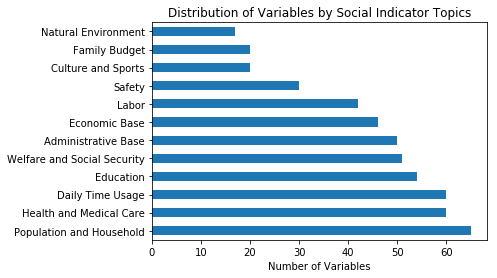

In [18]:
def var_count(df):
    var = list(df.columns.get_level_values(0).unique())
    var.pop(0)
    return len(var)

vc = []
for i in all_df:
    vc.append(var_count(i))

topics = ['Population and Household', 'Natural Environment', 'Labor', 'Economic Base', 'Administrative Base', 'Education', 'Culture and Sports', 'Health and Medical Care', 'Welfare and Social Security', 'Safety', 'Family Budget', 'Daily Time Usage', 'Dwelling']

varcount_df = pd.DataFrame(list(zip(topics, vc)), columns =['Name', 'Variables'])
varcount_df.sort_values(by='Variables',ascending=False).plot(x='Name', y='Variables', kind='barh', legend=False)
plt.xlabel('Number of Variables')
plt.ylabel('')
plt.title('Distribution of Variables by Social Indicator Topics')

## Functions to Process Data

In [19]:
def process_df(df):
    df.drop(df.loc[df['Prefecture', 'Unnamed: 0_level_1'] == 'All Japan'].index, inplace=True)
    df.sort_values([('Prefecture', 'Unnamed: 0_level_1')], ascending=True, inplace=True)
    df['MMA', 'Unnamed: 0_level_1'] = df['Prefecture', 'Unnamed: 0_level_1'].map(MMA)
    #df.columns[] = map(str.lower, df.columns)
    
    #Add to combined?
    df['gpkg_key', 'Unnamed: 0_level_1'] = ['Aichi', 'Akita', 'Aomori', 'Chiba', 'Ehime', 'Fukui', 'Fukuoka', 'Fukushima', 'Gifu', 'Gunma', 
                      'Hiroshima', 'Hokkaido', 'Hyago', 'Ibaraki', 'Ishikawa','Iwate', 'Kagawa', 'Kagoshima', 'Kanagawa',
                      'Kochi', 'Kumamoto', 'Kyoto', 'Mie', 'Miyagi', 'Miyazaki', 'Nagano', 'Naoasaki', 'Nara', 'Niigata',
                      'Oita', 'Okayama', 'Okinawa', 'Osaka', 'Saga', 'Saitama', 'Shiga','Shimane', 'Shizuoka', 'Tochigi',
                      'Tokushima', 'Tokyo', 'Tottori', 'Toyama', 'Wakayama', 'Yamagata', 'Yamaguchi', 'Yamanashi']

In [20]:
# Only Keep the Values that are the same

def drop_values(df15, df10):
    var_1 = list(df15.columns.get_level_values(0).unique())
    var_2 = list(df10.columns.get_level_values(0).unique())
    diff = set(var_1) ^ set(var_2)

    diff15 = list(set(var_1) & set(diff))
    not_in_2010= []
    for val in diff15:
        not_in_2010.append((val, '2015'))

    diff10 = list(set(var_2) & set(diff))
    not_in_2015= []
    for val in diff10:
        not_in_2015.append((val, '2010'))

    df15 = df15.drop(not_in_2010, axis=1)
    df10 = df10.drop(not_in_2015, axis=1)
    
    return (df15, df10)

In [21]:
def combine_process(df_list, df15_file, df10_file):
    comb_df = reduce(lambda left, right: pd.merge(left, right, on=[('Prefecture', 'Unnamed: 0_level_1')], left_index=True, right_index=True, how='outer'), df_list)
    process_df(comb_df)

    df_15 = comb_df[[i for i in comb_df.columns if i[1] == '2015' or i[1] == 'Unnamed: 0_level_1']]
    df_10 = comb_df[[i for i in comb_df.columns if i[1] == '2010' or i[1] == 'Unnamed: 0_level_1']]
    
    df15, df10 = drop_values(df_15, df_10)
    
    #Save Files
    file_15 = r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + df15_file + '.csv'
    df15.to_csv(file_15, index=False)
    
    file_10 = r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + df10_file + '.csv'
    df10.to_csv(file_10, index=False)

In [22]:
def re_process(csv_15, csv_10, df15_file, df10_file):
    df_2015 = pd.read_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + csv_15 + '.csv')
    df_2010 = pd.read_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + csv_10 + '.csv')


    df_2015 = df_2015.drop(df_2015.index[0])
    df_2015.columns = df_2015.columns.str.replace('\n',' ').str.strip().str.lower()
    df_2015 = df_2015.add_suffix(' 2015')

    df_2010 = df_2015.drop(df_2015.index[0])
    df_2010.columns = df_2015.columns.str.replace('\n',' ').str.strip().str.lower()
    df_2010 = df_2015.add_suffix(' 2010')
    
    #os.remove('old.txt')

    #Save Files
    file_15 = r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + df15_file + '.csv'
    df_2015.to_csv(file_15, index=False)
    
    file_10 = r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + df10_file + '.csv'
    df_2010.to_csv(file_10, index=False)

## Clean and Process Data

In [23]:
#Create Population DataFrame

combine_process([pop_df], 'pop_df15_del', 'pop_df10_del')
re_process('pop_df15_del', 'pop_df10_del', 'pop_df15', 'pop_df10')

In [24]:
#Create All Combined DataFrame

combine_process(all_df, 'comb_df15_del', 'comb_df10_del')
re_process('comb_df15_del', 'comb_df10_del', 'comb_df15', 'comb_df10')

## Final Variable Distribution

In [25]:
csv_15 = 'comb_df15'
comb_df2015 = pd.read_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + csv_15 + '.csv')

csv_10 = 'comb_df10'
comb_df2010 = pd.read_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + csv_10 + '.csv')